In [ ]:
# Install Ultralytics (YOLOv8) dan Roboflow SDK
!pip install ultralytics roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="S4xMwV6xej7eyEhacdsA")
project = rf.workspace("skripsi-lcybh").project("kepadatan-parkir-motor")
version = project.version(9)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Kepadatan-Parkir-Motor-9 in yolov8:: 100%|██████████| 2892/2892 [00:00<00:00, 5314.01it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import yaml

# Cek isi data.yaml
with open(f"{dataset.location}/data.yaml", 'r') as f:
    data_yaml = yaml.safe_load(f)

print("Classes:", data_yaml['names'])


Classes: ['Motorcycle']


In [ ]:
from ultralytics import YOLO

# Buat model baru (gunakan 'yolov8n.pt' / 'yolov8s.pt' dll)
model = YOLO('yolov8s.pt')  # atau 'yolov8n.pt' untuk lebih ringan

# Mulai training
model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=30,
    imgsz=416,
    batch=16
)


100%|██████████| 21.5M/21.5M [00:00<00:00, 242MB/s]


Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Kepadatan-Parkir-Motor-9/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

100%|██████████| 755k/755k [00:00<00:00, 26.9MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2116435  ultralytics.nn.modules.head.Detect           [1, [128, 256, 512]]          
Model summary: 129 layers, 11,135,987 parameters, 11,135,971 gradients, 28.6 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 104MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1233.5±515.3 MB/s, size: 68.6 KB)


train: Scanning /content/Kepadatan-Parkir-Motor-9/train/labels... 1240 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1240/1240 [00:00<00:00, 1996.09it/s]

train: New cache created: /content/Kepadatan-Parkir-Motor-9/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 955.0±317.6 MB/s, size: 71.8 KB)


val: Scanning /content/Kepadatan-Parkir-Motor-9/valid/labels... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 1367.95it/s]

val: New cache created: /content/Kepadatan-Parkir-Motor-9/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.03G      1.675      1.267      1.429        305        416: 100%|██████████| 78/78 [00:17<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all        100       1856      0.905      0.899      0.962      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.19G       1.32     0.7406      1.187        312        416: 100%|██████████| 78/78 [00:14<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]

                   all        100       1856      0.915      0.904      0.963      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.22G      1.271     0.6961      1.157        233        416: 100%|██████████| 78/78 [00:14<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]

                   all        100       1856      0.885      0.871      0.941       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.25G       1.25     0.6785      1.149        256        416: 100%|██████████| 78/78 [00:14<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]

                   all        100       1856      0.937      0.917      0.975      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30       2.3G      1.209     0.6329      1.127        260        416: 100%|██████████| 78/78 [00:15<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.55it/s]

                   all        100       1856      0.943      0.931       0.98      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.32G      1.181     0.6148      1.112        405        416: 100%|██████████| 78/78 [00:14<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.66it/s]

                   all        100       1856      0.946      0.939      0.982      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.37G      1.146     0.5911      1.096        212        416: 100%|██████████| 78/78 [00:14<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all        100       1856      0.947      0.938      0.983      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       2.4G       1.14     0.5838      1.089        338        416: 100%|██████████| 78/78 [00:14<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]

                   all        100       1856      0.942      0.933       0.98      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.44G      1.129     0.5695      1.087        370        416: 100%|██████████| 78/78 [00:15<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.90it/s]

                   all        100       1856      0.947      0.925      0.981      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.47G      1.095     0.5503      1.068        321        416: 100%|██████████| 78/78 [00:14<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.58it/s]

                   all        100       1856      0.955      0.922      0.983      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.52G      1.091     0.5465       1.07        327        416: 100%|██████████| 78/78 [00:14<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]

                   all        100       1856      0.947      0.939      0.984       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.54G      1.079     0.5378      1.062        269        416: 100%|██████████| 78/78 [00:14<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all        100       1856      0.949      0.921       0.98      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.59G      1.051     0.5265      1.053        305        416: 100%|██████████| 78/78 [00:14<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.56it/s]

                   all        100       1856       0.95      0.942      0.985      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.69G      1.044     0.5176      1.046        234        416: 100%|██████████| 78/78 [00:14<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.78it/s]

                   all        100       1856      0.946      0.943      0.983      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.84G      1.022     0.5065      1.034        258        416: 100%|██████████| 78/78 [00:15<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.83it/s]

                   all        100       1856       0.94      0.945      0.984      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.86G      1.003     0.4942      1.033        323        416: 100%|██████████| 78/78 [00:15<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]

                   all        100       1856      0.951      0.926      0.977      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.91G     0.9935     0.4883      1.025        320        416: 100%|██████████| 78/78 [00:15<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.98it/s]

                   all        100       1856       0.96      0.926      0.983       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.93G      0.981     0.4821      1.019        321        416: 100%|██████████| 78/78 [00:15<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.59it/s]

                   all        100       1856      0.965      0.929      0.984      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.98G     0.9753     0.4765      1.017        305        416: 100%|██████████| 78/78 [00:15<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.90it/s]

                   all        100       1856      0.944       0.94      0.983       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30       3.1G     0.9583     0.4664      1.012        234        416: 100%|██████████| 78/78 [00:15<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.50it/s]

                   all        100       1856      0.955      0.934      0.982      0.708


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.14G     0.9245     0.4427      1.004        166        416: 100%|██████████| 78/78 [00:16<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        100       1856      0.949      0.938      0.983      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.17G     0.9003     0.4191     0.9921        120        416: 100%|██████████| 78/78 [00:14<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.56it/s]

                   all        100       1856       0.94      0.938      0.979      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.22G     0.8851      0.412      0.986        129        416: 100%|██████████| 78/78 [00:14<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.96it/s]

                   all        100       1856      0.955      0.928      0.982      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.24G     0.8647     0.3998     0.9789        189        416: 100%|██████████| 78/78 [00:14<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]

                   all        100       1856      0.952      0.938      0.982      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.29G     0.8438     0.3916     0.9689        161        416: 100%|██████████| 78/78 [00:15<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.81it/s]

                   all        100       1856      0.966      0.926      0.982      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.32G     0.8234     0.3827     0.9624        190        416: 100%|██████████| 78/78 [00:14<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all        100       1856      0.943      0.942      0.977      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30       3.4G     0.8163     0.3764     0.9583        161        416: 100%|██████████| 78/78 [00:14<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]

                   all        100       1856       0.97      0.914      0.978      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.43G     0.7973     0.3655     0.9508        189        416: 100%|██████████| 78/78 [00:14<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.48it/s]

                   all        100       1856       0.96      0.921      0.978       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30       3.5G     0.7741     0.3561     0.9472        145        416: 100%|██████████| 78/78 [00:14<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]

                   all        100       1856      0.962      0.919      0.978      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.64G     0.7646     0.3536     0.9401        154        416: 100%|██████████| 78/78 [00:14<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.38it/s]

                   all        100       1856      0.942      0.939      0.978       0.72



30 epochs completed in 0.136 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]


                   all        100       1856       0.97      0.914      0.978      0.721
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ba0e062de90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

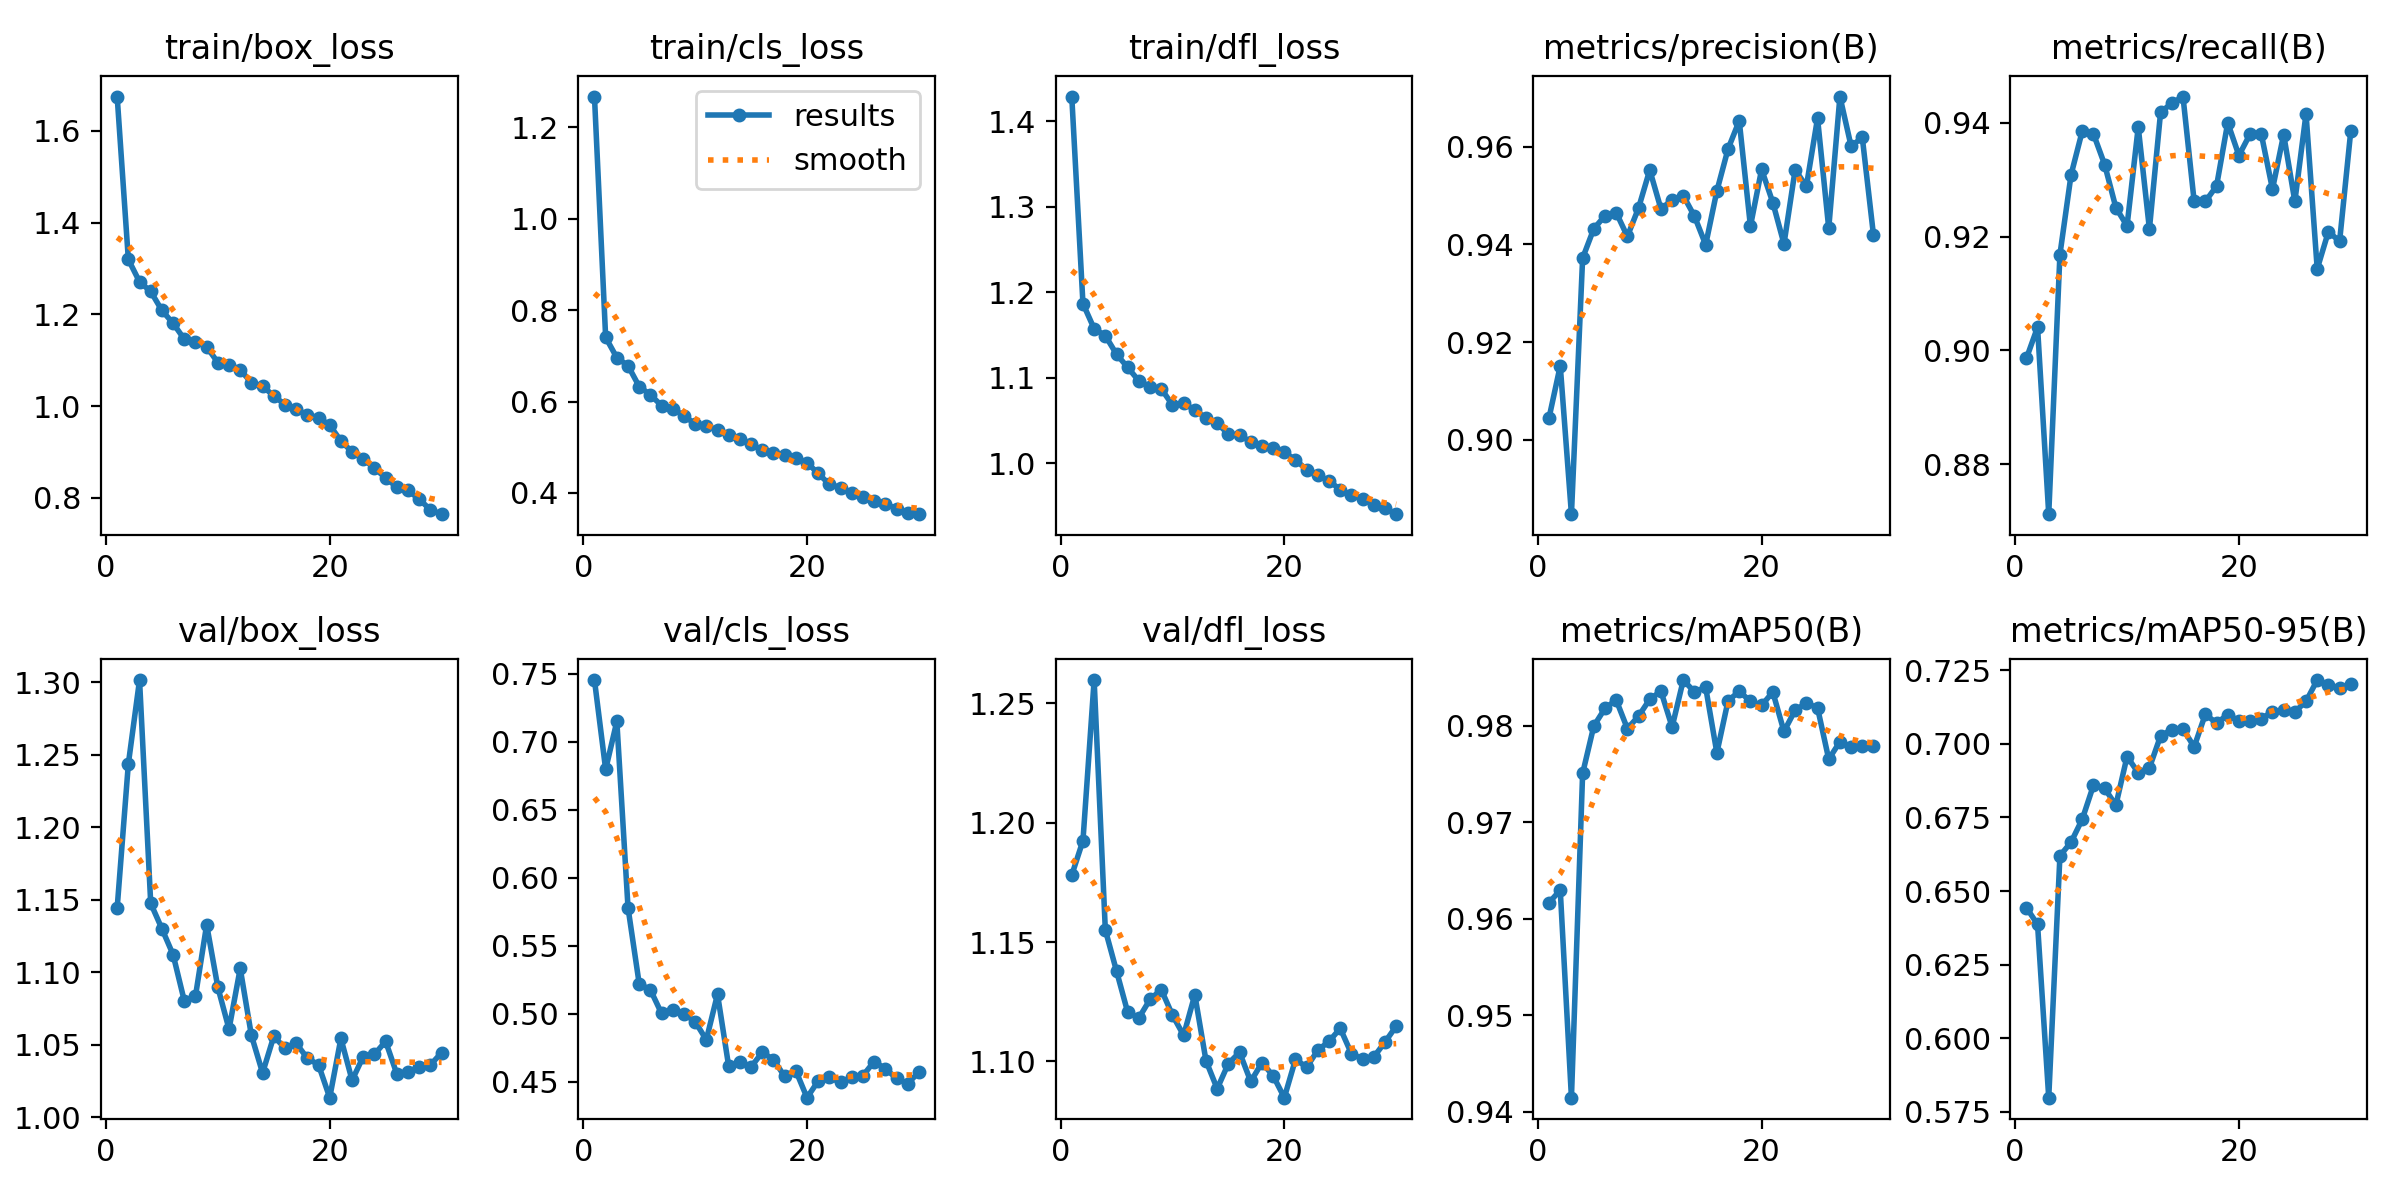

In [ ]:
from IPython.display import Image

# Gambar hasil training (jika tersedia)
Image(filename='runs/detect/train/results.png', width=700)


In [ ]:
# Gunakan model hasil training terbaik
model = YOLO('runs/detect/train/weights/best.pt')

# Lakukan deteksi
results = model.predict(
    source=f"{dataset.location}/test/images",
    conf=0.25,
    save=True  # hasil akan tersimpan di runs/detect/predict
)



image 1/100 /content/Kepadatan-Parkir-Motor-9/test/images/IMG_20240513_114253_jpg.rf.965fe54ebb0dc83d8740544229400678.jpg: 320x416 14 Motorcycles, 47.0ms
image 2/100 /content/Kepadatan-Parkir-Motor-9/test/images/IMG_20240513_114310_jpg.rf.84b8588be5c25846a755e275730bd5cf.jpg: 320x416 11 Motorcycles, 8.2ms
image 3/100 /content/Kepadatan-Parkir-Motor-9/test/images/IMG_20240513_114411_jpg.rf.b8eb708e76910398440b04c80e6a1c0e.jpg: 320x416 11 Motorcycles, 8.2ms
image 4/100 /content/Kepadatan-Parkir-Motor-9/test/images/IMG_20240513_114416_jpg.rf.03639bfef136ab400bc70d3c48928e18.jpg: 320x416 9 Motorcycles, 8.2ms
image 5/100 /content/Kepadatan-Parkir-Motor-9/test/images/IMG_20240513_114427_jpg.rf.f42c0cc43783debd410a6a1f179cf6b7.jpg: 320x416 15 Motorcycles, 8.3ms
image 6/100 /content/Kepadatan-Parkir-Motor-9/test/images/IMG_20240513_114432_jpg.rf.aa024a47d0b3e11842ff11a5034a636b.jpg: 320x416 12 Motorcycles, 8.2ms
image 7/100 /content/Kepadatan-Parkir-Motor-9/test/images/IMG_20240513_114436_jpg

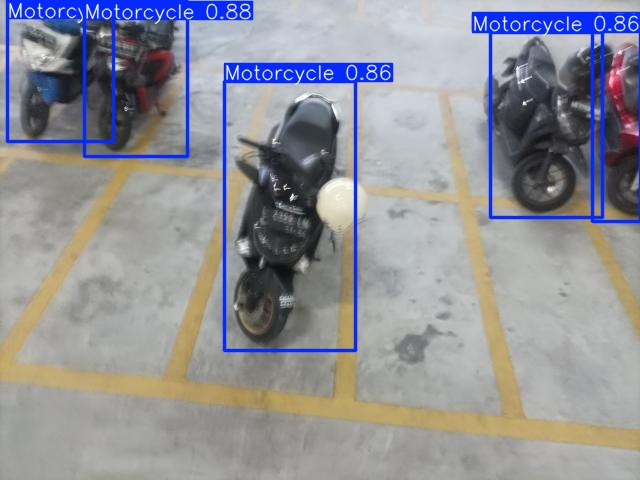

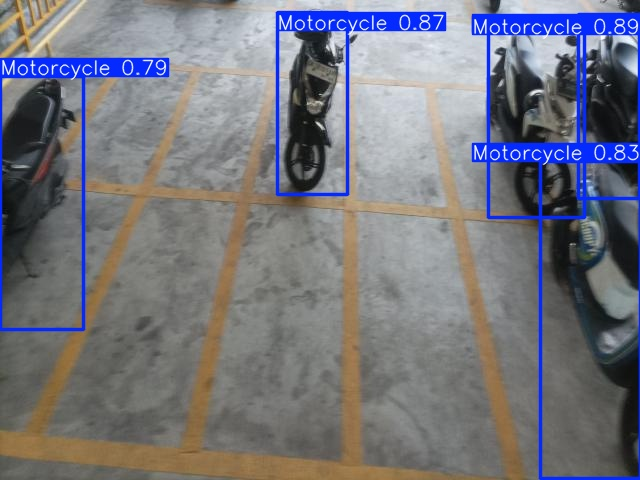

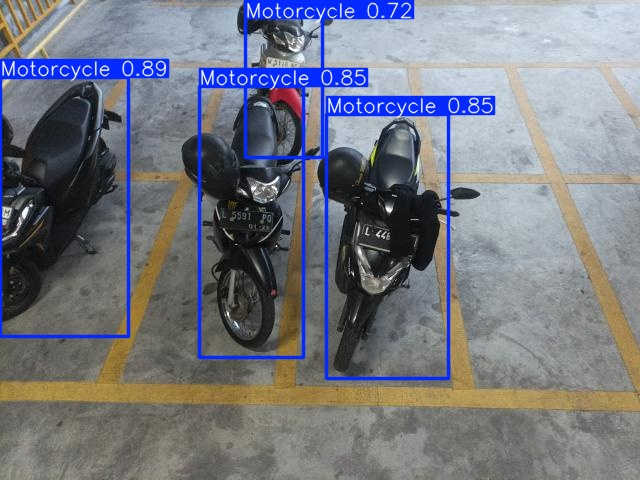

In [ ]:
import glob
from IPython.display import Image, display

detected_images = glob.glob('runs/detect/predict/*.jpg')

for img_path in detected_images[:3]:  # tampilkan 3 hasil pertama
    display(Image(filename=img_path, width=600))


In [ ]:
from google.colab import files
files.download('runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>